# Analisis exploratorio para variables numericas

En este notebook nos centraremos en analizar la variables numericas (columnas) para extraer infomacion de las mismas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_laptops = pd.read_csv("dataset/p_laptops.csv")

Primeramente retomemos el .describe() para ver un vistazo rapido a estadisticos fundamentales de los datos

In [3]:
# Identificamos las columnas numéricas para el análisis (excluyendo las binarias que ya analizamos)
numeric_features = [
    'Inches',
    'Ram',
    'Weight',
    'ScreenW',
    'ScreenH',
    'CPU_freq',
    'PrimaryStorage',
    'SecondaryStorage'
]

df_laptops[numeric_features].describe()

,Inches,Ram,Weight,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


Ahora veamos los histogramas de estas variables junto a sus graficas de caja y bigotes para ver como se distribuyen y si presentan o no valores atipicos (outlayers)

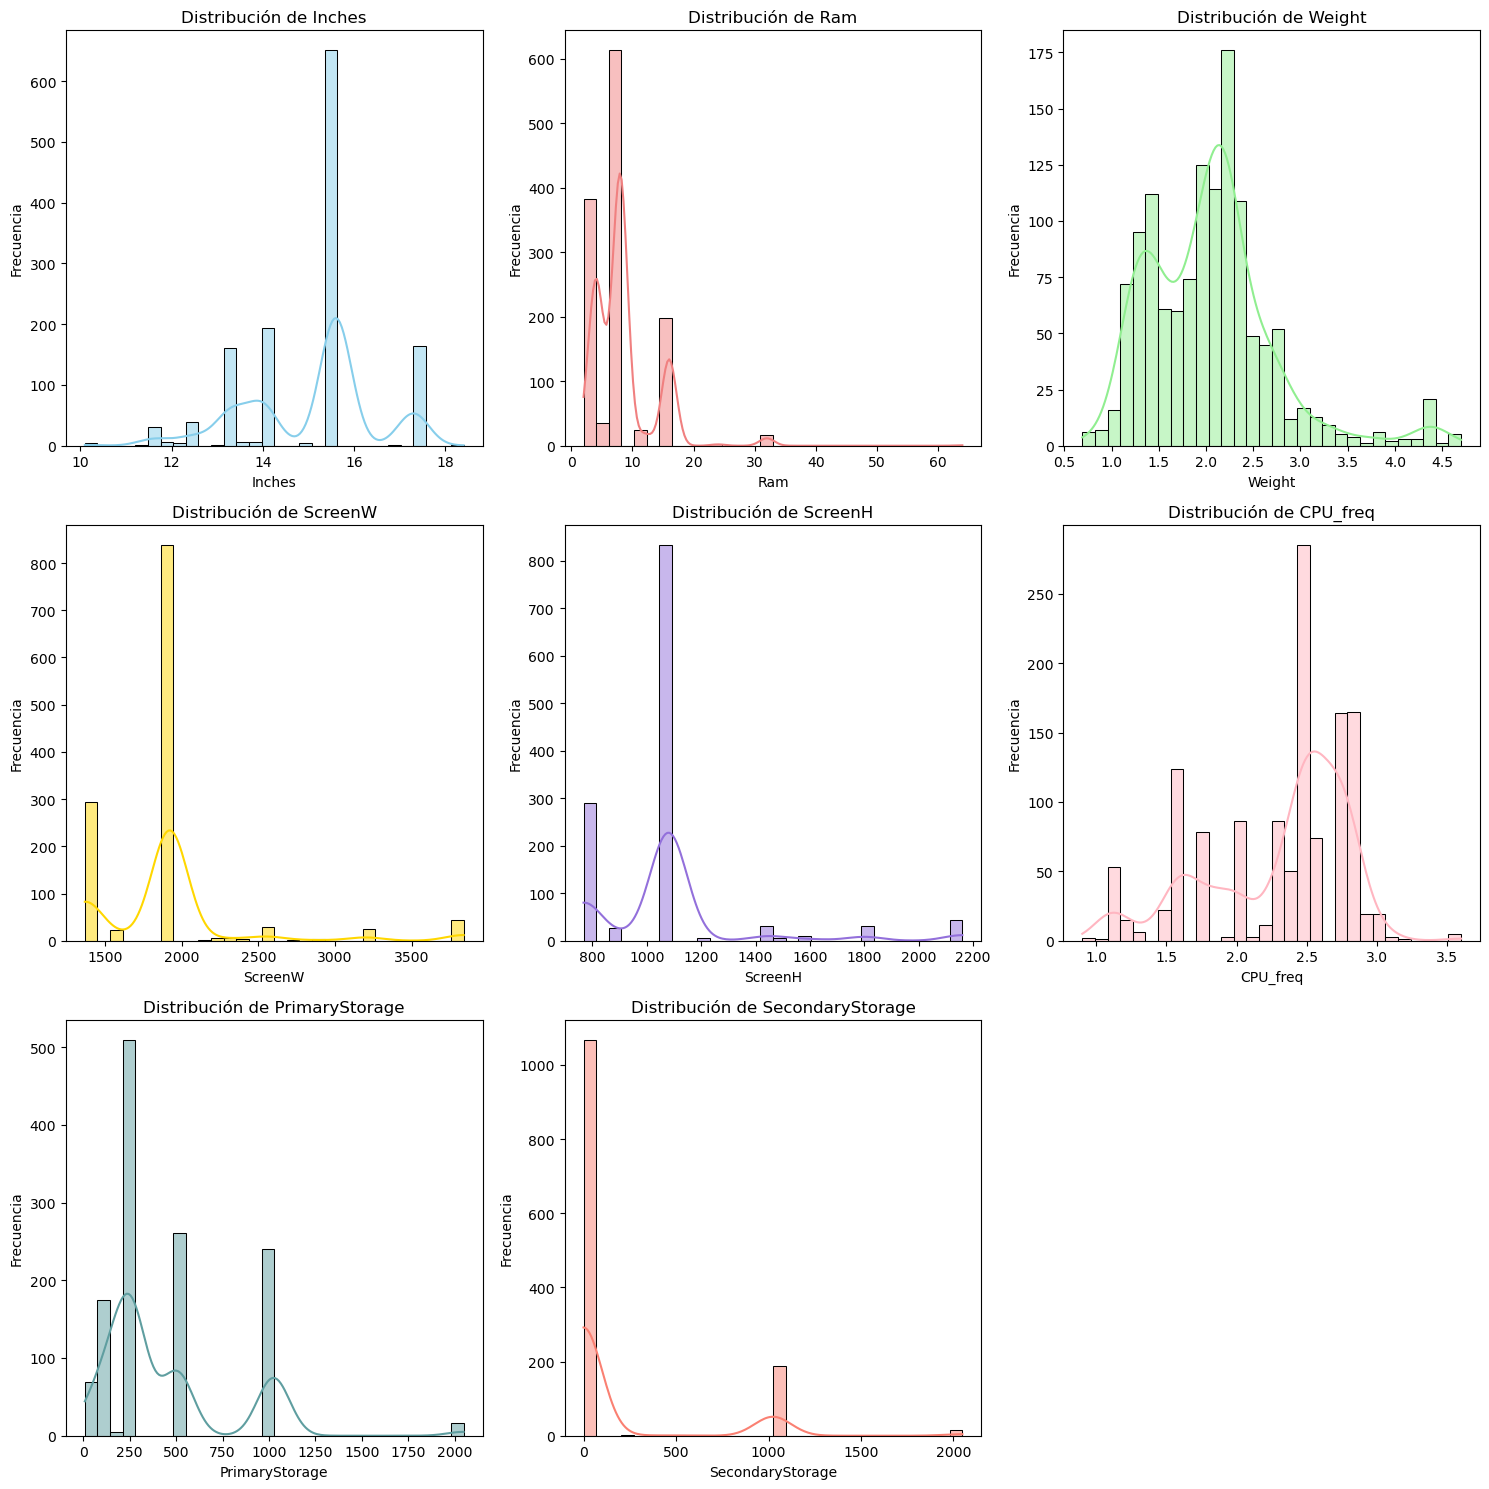

In [5]:
# Paleta de colores para los histogramas
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'mediumpurple', 'lightpink', 'cadetblue', 'salmon', 'olivedrab']

plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    # Usamos el operador módulo (%) para asegurarnos de que el índice del color
    # siempre esté dentro de los límites de la lista 'colors'
    sns.histplot(df_laptops[col], kde=True, bins=30, color=colors[i % len(colors)])
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### <center> Resumen de Distribuciones de Variables Numéricas </center>

| Variable | Características de la Distribución | Posibles Outliers / Observaciones Clave |
| :------- | :--------------------------------- | :-------------------------------------- |
| **Inches** | Distribución bimodal con picos alrededor de 13 y 15. Hay una concentración de laptops con pantallas de 13 y 15 pulgadas. La mayoría de los datos se encuentran entre 12 y 16 pulgadas. | Parece haber algunos valores atípicos menores en los extremos, como pulgadas menores de 11 o mayores de 17, aunque son poco frecuentes. |
| **Ram** | Distribución altamente sesgada a la derecha. La mayoría de los laptops tienen 8 GB de RAM, seguido de 4 GB y 16 GB. La frecuencia disminuye drásticamente a medida que aumenta la RAM. | Se observan claros valores atípicos en el extremo superior, con algunas laptops teniendo 32 GB o incluso 64 GB de RAM, siendo mucho menos comunes que los valores centrales. |
| **Weight** | Distribución aproximadamente simétrica, ligeramente sesgada a la derecha. La mayoría de los laptops pesan entre 1.5 kg y 2.5 kg. | Algunos posibles valores atípicos en el extremo superior de peso (por encima de 3.5 kg), que son menos comunes. |
| **ScreenW** | Distribución bimodal o multimodal con picos claros alrededor de 1920 (Full HD) y otro pico en torno a 1366. Estos representan las resoluciones de pantalla más comunes en ancho. | Los valores atípicos son posibles en resoluciones de ancho muy bajas (por debajo de 1000) o muy altas (por encima de 3000). |
| **ScreenH** | Distribución similar a `ScreenW`, con picos prominentes alrededor de 1080 (Full HD) y otro pico en torno a 768. Estos son los anchos de pantalla más comunes. | Similar a `ScreenW`, los valores atípicos podrían ser resoluciones de alto muy bajas (por debajo de 700) o muy altas (por encima de 2000). |
| **CPU_freq** | Distribución con varios picos, sugiriendo múltiples rangos de frecuencias de CPU. Hay concentraciones alrededor de 2.0 GHz y 2.5 GHz. | Pueden existir outliers en frecuencias de CPU muy bajas (por debajo de 1.0 GHz) o muy altas (por encima de 3.0 GHz). |
| **PrimaryStorage** | Distribución altamente sesgada a la derecha con un pico muy grande en 256 GB, seguido de 512 GB y 128 GB. | Se observan valores atípicos significativos en el extremo superior, con dispositivos que tienen almacenamiento primario de 1 TB (1000 GB) o incluso 2 TB (2000 GB), siendo muy poco frecuentes en comparación. |
| **SecondaryStorage** | Distribución extremadamente sesgada a la derecha, con la vasta mayoría de las laptops no teniendo almacenamiento secundario (0 GB). Cuando existe, los valores comunes son 256 GB y 512 GB. | Los valores atípicos son aquellos laptops que sí tienen almacenamiento secundario, especialmente si es una cantidad grande (e.g., 1 TB o más), ya que la mayoría no lo tiene. |

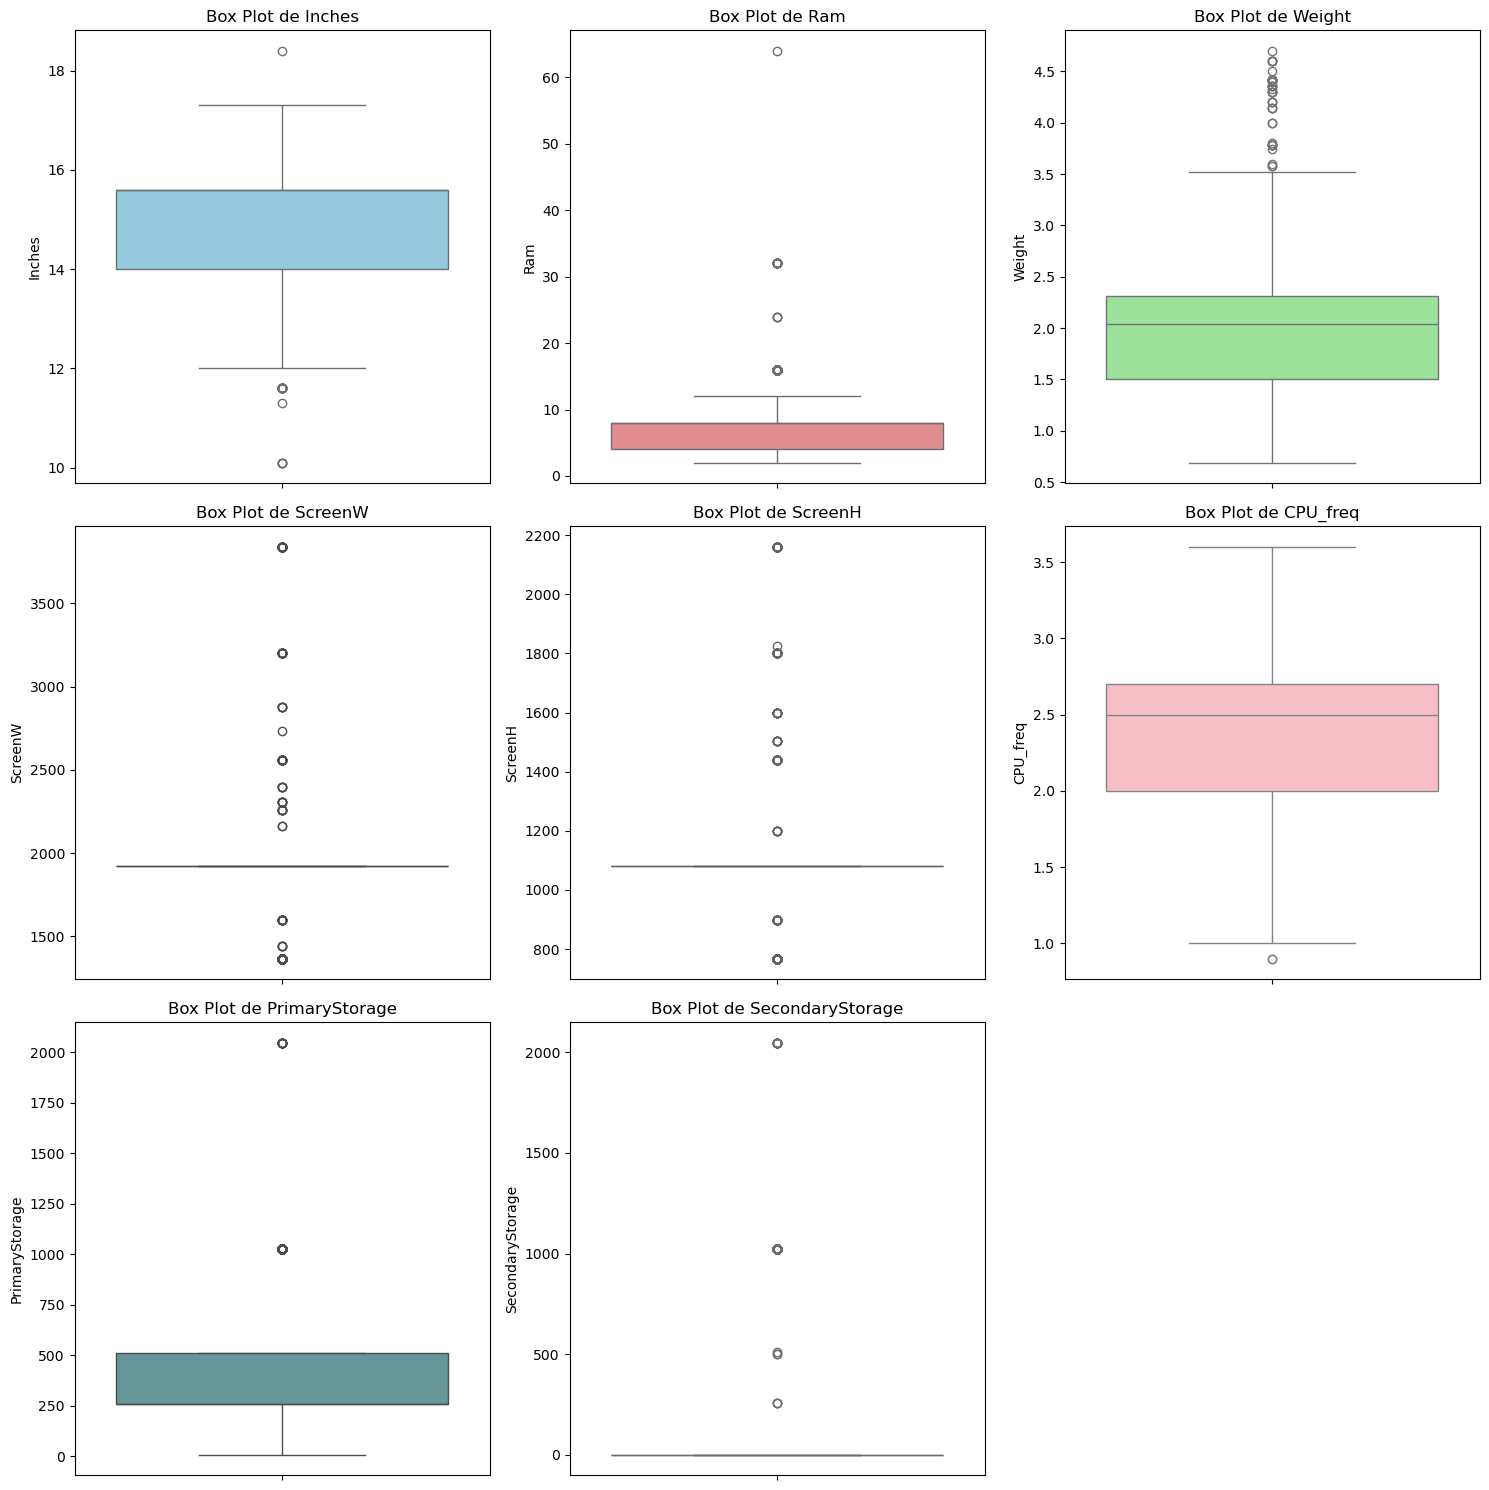

In [6]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    # Asignamos el color del box plot utilizando la misma lógica que antes
    sns.boxplot(y=df_laptops[col], color=colors[i % len(colors)])
    plt.title(f'Box Plot de {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### <center> Resumen de Box Plots de Variables Numéricas (Detección de Outliers) </center>

| Variable | Características del Box Plot (Mediana, IQR) | Outliers Identificados (Valores Atípicos) |
| :------- | :----------------------------------------- | :---------------------------------------- |
| **Inches** | La mediana está alrededor de 15 pulgadas. El rango intercuartílico (IQR) sugiere que la mayoría de las pantallas se encuentran entre $\sim$13 y 16 pulgadas. | Se observan algunos outliers por debajo de 12 pulgadas y por encima de 17 pulgadas, lo que indica laptops con tamaños de pantalla inusualmente pequeños o grandes. |
| **Ram** | La mediana se encuentra en 8 GB, con un IQR muy ajustado que indica que la gran mayoría de laptops tienen 8 GB de RAM o menos. El box plot es muy compacto. | Hay numerosos y significativos outliers en el extremo superior, con valores de RAM que van desde 12 GB hasta 64 GB, confirmando la presencia de laptops con configuraciones de RAM mucho más altas que el promedio. |
| **Weight** | La mediana se sitúa alrededor de 2.0 kg. El IQR abarca pesos entre $\sim$1.5 kg y 2.5 kg, indicando la concentración de la mayoría de los laptops. | Se observan algunos outliers en el extremo superior de peso, especialmente por encima de 3.5 kg, representando laptops más pesadas de lo común. |
| **ScreenW** | La mediana está cerca de 1920 píxeles, con un IQR que indica que la mayoría de las resoluciones de ancho se agrupan en torno a 1920 píxeles (Full HD). | Hay una cantidad considerable de outliers por debajo del rango principal (resoluciones de ancho menores a $\sim$1920 px) y algunos por encima (resoluciones de ancho muy altas), lo que sugiere una variedad de pantallas menos comunes. |
| **ScreenH** | La mediana se encuentra en 1080 píxeles. El IQR muestra que la mayoría de las resoluciones de alto se concentran alrededor de 1080 píxeles (Full HD). | Al igual que `ScreenW`, se identifican numerosos outliers por debajo del rango principal (resoluciones de alto menores a $\sim$1080 px) y algunos por encima, indicando otras resoluciones de pantalla menos frecuentes. |
| **CPU_freq** | La mediana está alrededor de 2.5 GHz. El IQR muestra que la mayoría de las frecuencias de CPU están entre $\sim$2.0 GHz y 2.7 GHz. | Se observan outliers en ambos extremos: frecuencias de CPU muy bajas (por debajo de 1.5 GHz) y algunas muy altas (por encima de 3.0 GHz), lo que indica procesadores menos comunes. |
| **PrimaryStorage** | La mediana se encuentra en 256 GB. El IQR es relativamente pequeño, concentrando la mayoría del almacenamiento primario en 256 GB o valores cercanos. | Hay numerosos outliers significativos en el extremo superior, con valores que van desde 512 GB hasta 2 TB (2000 GB), lo que confirma la existencia de laptops con mucho más almacenamiento primario que la media. |
| **SecondaryStorage** | La mediana es 0 GB, y el IQR es prácticamente inexistente en el valor 0, lo que indica que la gran mayoría de laptops no tienen almacenamiento secundario. | Los outliers son los valores mayores a 0 GB, representando las laptops que sí tienen almacenamiento secundario (e.g., 256 GB, 512 GB), confirmando que son una minoría. |

Ahora mediante graficos de dispersion veamos la relacion de las distintas variables numericas (no binararias) del dataset con las variable 'Price_euros' para ver que informacion podemos extraer de ahi


--- Gráficos de Dispersión vs. Price_euros ---


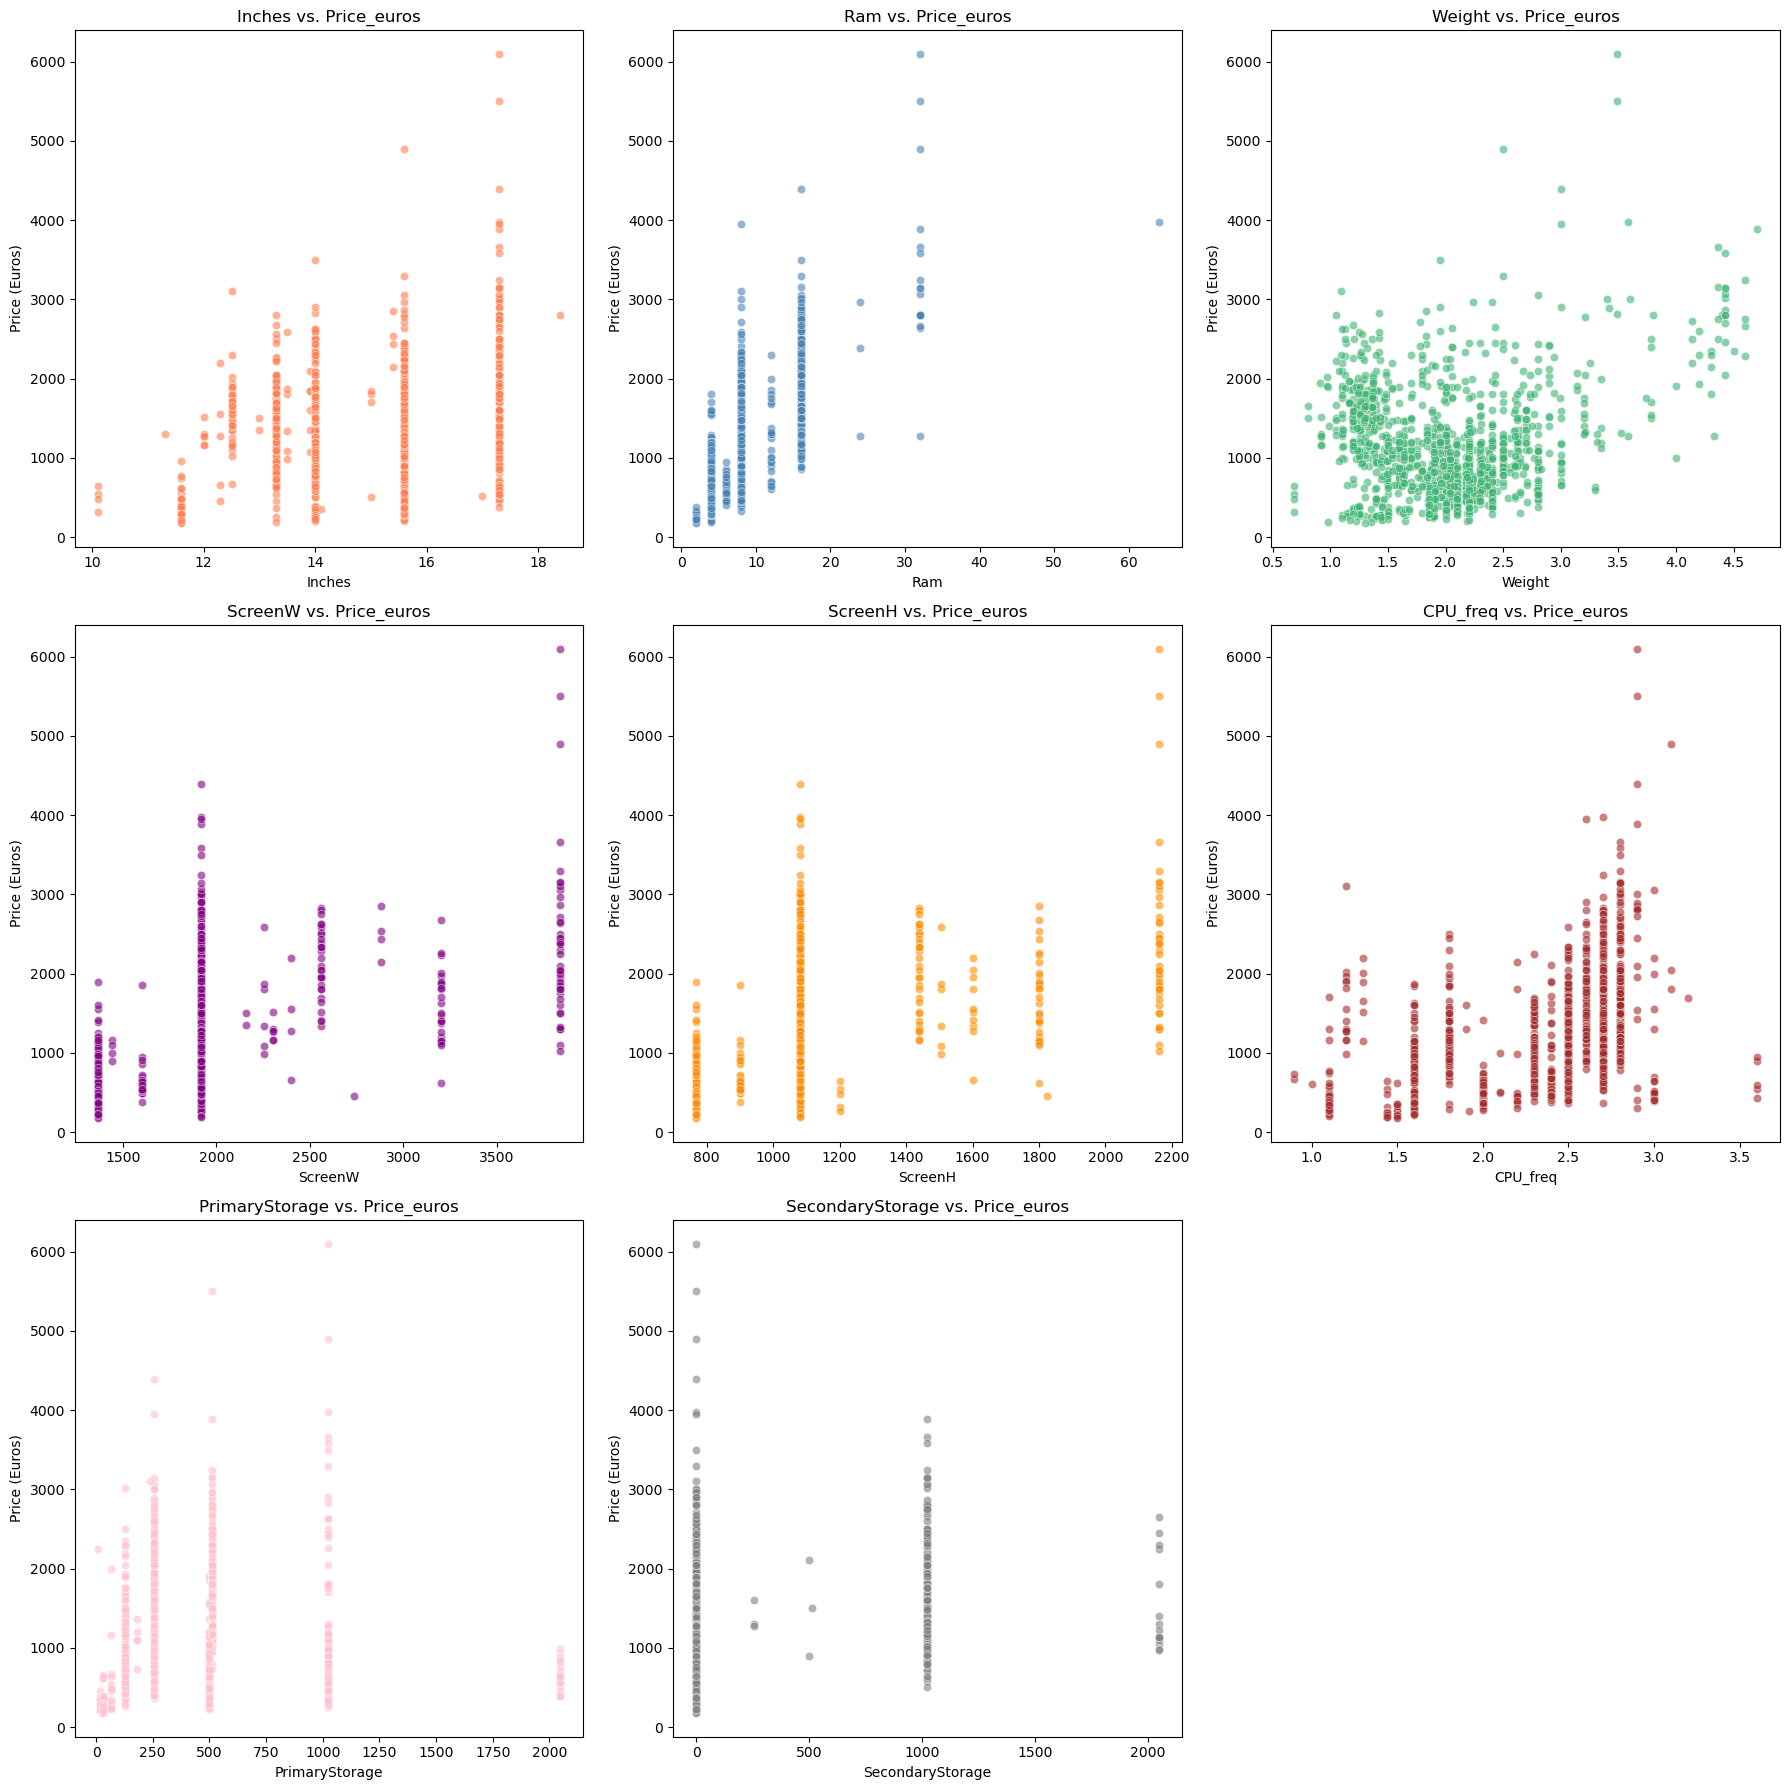

In [8]:
colors = ['coral', 'steelblue', 'mediumseagreen', 'purple', 'darkorange', 'brown', 'pink', 'gray', 'olive']

print("\n--- Gráficos de Dispersión vs. Price_euros ---")
plt.figure(figsize=(18, 18))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    # Asignamos un color diferente a cada gráfico de dispersión
    sns.scatterplot(x=df_laptops[col], y=df_laptops['Price_euros'], alpha=0.6, color=colors[i % len(colors)])
    plt.title(f'{col} vs. Price_euros')
    plt.xlabel(col)
    plt.ylabel('Price (Euros)')
plt.tight_layout()
plt.show()

### <center> Resumen de Gráficos de Dispersión (Relación con Precio en Euros) </center>

| Variable | Relación con `Price_euros` (Observaciones Clave) | Correlación Implicada / Patrón | Posibles Outliers en la Relación |
| :------- | :--------------------------------------------- | :-------------------------------------- | :-------------------------------- |
| **Inches** | No se observa una correlación lineal fuerte. Los precios altos se encuentran en un rango limitado de pulgadas (principalmente 13-16 pulgadas), mientras que el rango completo de pulgadas puede tener precios bajos. Existe una dispersión amplia de precios para cada tamaño de pantalla. | Aparente correlación no lineal o débil. Los precios más altos no se asocian necesariamente con los tamaños de pantalla más grandes o pequeños. | Puntos dispersos que no siguen ningún patrón claro, especialmente aquellos con precios muy altos para pulgadas no extremas, o precios muy bajos para pulgadas comunes. |
| **Ram** | Se observa una tendencia general: a medida que aumenta la RAM, también tiende a aumentar el precio. Sin embargo, hay una gran dispersión de precios para cada nivel de RAM. Los precios más altos se encuentran en laptops con mayor RAM. | Correlación positiva, aunque con alta variabilidad. Laptops con más RAM suelen ser más caras. | Laptops con RAM muy alta pero precios relativamente bajos, o laptops con RAM baja pero precios sorprendentemente altos. |
| **Weight** | Parece haber una correlación positiva débil: laptops más pesadas tienden a ser ligeramente más caras en general, pero la dispersión es muy alta. Existe una concentración de datos en pesos medios con un amplio rango de precios. | Correlación positiva débil. El peso por sí solo no es un predictor fuerte del precio. | Puntos con pesos muy bajos y precios altos, o pesos muy altos y precios bajos. |
| **ScreenW** | No se aprecia una correlación lineal clara. Las resoluciones de ancho más comunes (alrededor de 1920) muestran la mayor dispersión de precios, incluyendo los más altos. | Correlación no lineal o muy débil. La resolución de ancho no es un factor determinante por sí solo en el precio. | Puntos con resoluciones de ancho comunes y precios inusualmente bajos o altos. |
| **ScreenH** | Similar a `ScreenW`, no hay una correlación lineal evidente. Las resoluciones de alto más comunes (alrededor de 1080) también presentan una gran variabilidad en el precio. | Correlación no lineal o muy débil. La resolución de alto tampoco parece ser un factor directo en el precio. | Puntos con resoluciones de alto comunes y precios inusualmente bajos o altos. |
| **CPU_freq** | Se observa una tendencia general de que a mayor frecuencia de CPU, mayor es el precio, pero con una considerable dispersión. Los precios más altos se ven en frecuencias de 2.5 GHz o más. | Correlación positiva moderada, pero con mucha dispersión. Procesadores más rápidos tienden a ser más caros. | Laptops con frecuencias de CPU muy altas y precios bajos, o frecuencias de CPU bajas con precios sorprendentemente altos. |
| **PrimaryStorage** | Existe una clara correlación positiva: a mayor almacenamiento primario, mayor es el precio. Las laptops con 256 GB y 512 GB abarcan un amplio rango de precios, pero los precios más altos se encuentran en 1 TB o 2 TB. | Correlación positiva fuerte. El tamaño del almacenamiento primario es un factor importante en el precio. | Laptops con mucho almacenamiento pero precio bajo, o poco almacenamiento y precio alto, que se desvían de la tendencia general. |
| **SecondaryStorage** | La mayoría de los puntos se concentran en 0 GB de almacenamiento secundario, con un amplio rango de precios. Para los casos donde hay almacenamiento secundario, no hay un patrón claro con el precio, aunque algunos de los precios más altos se asocian con valores de almacenamiento secundario significativos. | Correlación muy débil o nula para los valores distintos de cero. La ausencia de almacenamiento secundario es lo más común. | Cualquier laptop con almacenamiento secundario es, en cierta medida, un outlier respecto a la mayoría de los datos, especialmente si el precio no se alinea con el tamaño de este. |

Ahora veamos la correlacion de las variables numericas y binarias del dataset. En realidad nos interesa sobretodo la relacion de las distintas variables con 'Price_euros' ya que su valor es el que nos interesa predecir


--- Matriz de Correlación de Variables Numéricas y Binarias ---


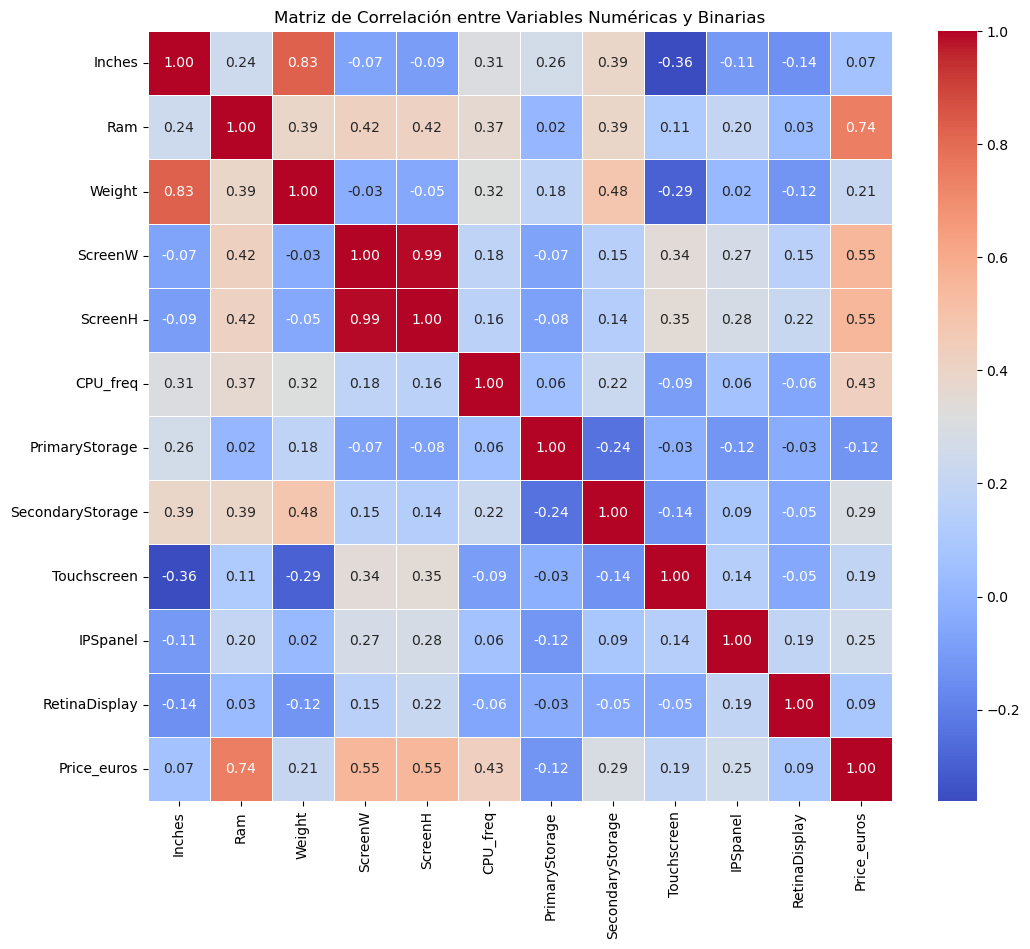

In [9]:
# Listas de características
numeric_features = [
    'Inches',
    'Ram',
    'Weight',
    'ScreenW',
    'ScreenH',
    'CPU_freq',
    'PrimaryStorage',
    'SecondaryStorage'
]

binary_features = [
    'Touchscreen',
    'IPSpanel',
    'RetinaDisplay'
]

# Unir todas las características numéricas y binarias, más la variable objetivo
all_numeric_and_binary_features = numeric_features + binary_features + ['Price_euros']

print("\n--- Matriz de Correlación de Variables Numéricas y Binarias ---")
# Seleccionar las columnas relevantes y calcular la matriz de correlación
correlation_matrix_full = df_laptops[all_numeric_and_binary_features].corr()

plt.figure(figsize=(12, 10)) # Aumenta el tamaño para acomodar más variables
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Variables Numéricas y Binarias')
plt.show()

### <center> Resumen de Correlación de Variables con `Price_euros` </center>

| Variable          | Coeficiente de Correlación con `Price_euros` | Interpretación de la Correlación                                                                                                                                      |
| :---------------- | :------------------------------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Inches** | 0.07                                         | Correlación positiva muy débil. Prácticamente no hay una relación lineal discernible entre el tamaño de la pantalla en pulgadas y el precio.                               |
| **Ram** | 0.74                                         | **Correlación positiva fuerte.** Existe una relación lineal sólida y directa: a mayor cantidad de RAM, tiende a ser mayor el precio de la laptop.                       |
| **Weight** | 0.21                                         | Correlación positiva débil. Laptops más pesadas tienden a ser marginalmente más caras, pero la relación lineal es muy limitada.                                         |
| **ScreenW** | 0.55                                         | **Correlación positiva moderada.** Una mayor resolución de ancho de pantalla (ScreenW) tiene una tendencia a asociarse con precios más altos.                          |
| **ScreenH** | 0.43                                         | **Correlación positiva moderada.** Similar a `ScreenW`, una mayor resolución de alto de pantalla (ScreenH) también tiende a relacionarse con precios más elevados.     |
| **CPU_freq** | 0.53                                         | **Correlación positiva moderada.** Laptops con mayor frecuencia de CPU tienden a tener precios más altos.                                                              |
| **PrimaryStorage**| 0.29                                         | Correlación positiva débil a moderada. Aunque positiva, la relación lineal entre el almacenamiento primario y el precio no es tan fuerte como otras variables.           |
| **SecondaryStorage**| 0.09                                       | Correlación positiva muy débil. La presencia o cantidad de almacenamiento secundario tiene una relación lineal casi inexistente con el precio.                         |
| **Touchscreen** | 0.14                                         | Correlación positiva muy débil. La presencia de una pantalla táctil tiene una asociación lineal muy leve con un precio más alto.                                       |
| **IPSpanel** | 0.19                                         | Correlación positiva débil. Las laptops con panel IPS tienden a tener precios ligeramente más altos, pero la relación lineal es modesta.                             |
| **RetinaDisplay** | 0.42                                         | **Correlación positiva moderada.** Las laptops con pantalla Retina (o tecnología similar, ya que es una variable binaria) tienden a tener precios significativamente más altos. |

Aqui termina la primera parte de este analisis en la segunda vamos a escojer las variables numericas y binarias que mejor se adaptan para la creacion de un modelo lineal que prediga 'Price_euros'

Sin embargo aqui falta algo antes de seguir revisando las correlaciones que veremos en el proximo notebook vamos a realizar la trasformacion Box-Cox a las variables numericas del dataset